In [1]:
import numpy as np
import matplotlib.pyplot as plt

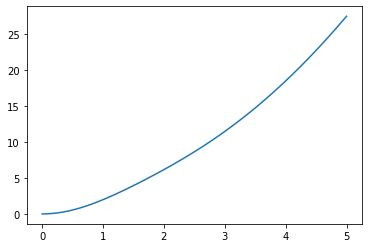

In [11]:
x=np.linspace(0,5,1001)
ph=x**2 - 2.5*np.exp(-0.5*x**2)+2.5
plt.plot(x,ph)

In [32]:
def get_phases(SNR):
    np.random.seed(42)
    r = SNR*np.cos(ph) + np.random.randn(ph.shape[0])
    im = SNR*np.sin(ph) + np.random.randn(ph.shape[0])
    phsim = np.arctan2(im,r)
    uphsim = np.unwrap(phsim)
    return phsim,uphsim

In [53]:
def get_phases2(ph,SNR):
    phnoisy = ph + np.random.randn(ph.shape[0])/SNR
    phsim = np.angle(np.exp(1J*phnoisy))
    uphsim = np.unwrap(phsim)
    return phsim,uphsim

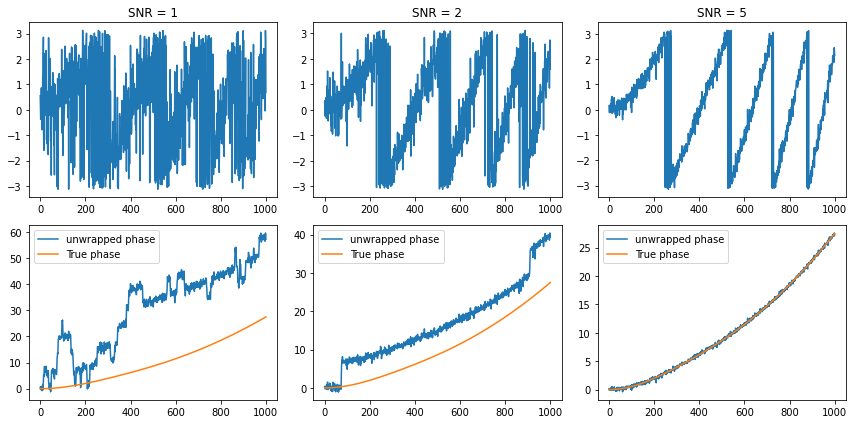

In [47]:
fig,ax=plt.subplots(2,3)
fig.set_size_inches(12,6)
for i,snr in enumerate((1,2,5)):
    p,u=get_phases(snr)
    ax[0][i].set_title(f"SNR = {snr}")
    ax[0][i].plot(p)
    ax[1][i].plot(u, label='unwrapped phase')
    ax[1][i].plot(ph,label='True phase')
    ax[1][i].legend()
plt.tight_layout()

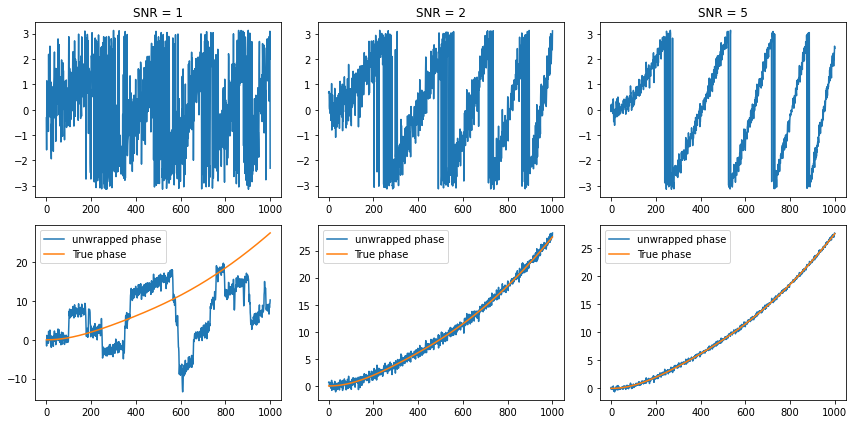

In [54]:
fig,ax=plt.subplots(2,3)
fig.set_size_inches(12,6)
for i,snr in enumerate((1,2,5)):
    p,u=get_phases2(ph,snr)
    ax[0][i].set_title(f"SNR = {snr}")
    ax[0][i].plot(p)
    ax[1][i].plot(u, label='unwrapped phase')
    ax[1][i].plot(ph,label='True phase')
    ax[1][i].legend()
plt.tight_layout()

In [55]:
def get_avg(arr,acclen):
    s=np.ceil(arr.shape[0]/acclen).astype(int)
    newarr=np.zeros((s,arr.shape[1]),dtype=arr.dtype)
    for i in range(0,s-1):
        b=np.mean(arr[i*acclen:(i+1)*acclen,:],axis=0)
        if(np.sum(b)==0):
            newarr[i,:] = np.nan
        else:
            newarr[i,:] = b
    newarr[-1,:]=np.mean(arr[(s-1)*acclen:,:],axis=0)
    return np.ma.masked_invalid(newarr)

In [59]:
p,u = get_phases2(ph,1)

In [75]:
r,im=np.cos(p),np.sin(p)

In [64]:
u2 = np.unwrap(np.arctan2(im,r))

In [87]:
avg_r = get_avg(r.reshape(r.shape[0],1),10)
avg_im = get_avg(im.reshape(im.shape[0],1),10)
u2 = np.unwrap(np.arctan2(avg_im,avg_r),axis=0)

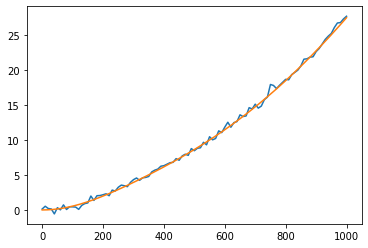

In [92]:

plt.plot(np.arange(0,101)*10,u2)
plt.plot(ph)

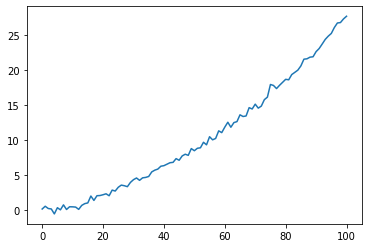